In [1]:
from whar_datasets.adapters.pytorch import PytorchAdapter
from whar_datasets.support.getter import WHARDatasetID, get_cfg_and_parser

In [2]:
cfg, parse = get_cfg_and_parser(WHARDatasetID.UCI_HAR)
dataset = PytorchAdapter(cfg, parse, override_cache=True)

Overriding cache...
Creating config hash...
Checking windowing...
Loading config hash...
Error: Config hash mismatch. Expected: abd03500ac5e1c42b62b391eaa4154286d6c91d62db7dace9c3885ff32cec731, Found: 70a4a7fb426bda3e82f7eabf5b1acff97372d94715499cd27e8ef976ebe0b5a9
Checking download...
Download is up-to-date.
Checking common format...
Common format is up-to-date.
Parsing...


Caching sessions: 100%|██████████| 400/400 [00:00<00:00, 601.18it/s]


Checking common format...
Common format is up-to-date.
Selecting activities...
[########################################] | 100% Completed | 3.17 sms


Caching windows: 100%|██████████| 4841/4841 [00:03<00:00, 1300.72it/s]


In [3]:
train_loader, val_loader, test_loader = dataset.get_dataloaders(32)

subject_ids: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
activity_ids: [0 1 2 3 4 5]
train: 3457 | val: 712 | test: 672


In [4]:
weights = dataset.get_class_weights(train_loader)

In [5]:
if cfg.dataset.training.in_memory:
    dataset.window_index
    assert dataset.windows is not None
    dataset.windows[6]

torch.Size([32]) torch.Size([32, 128, 9])


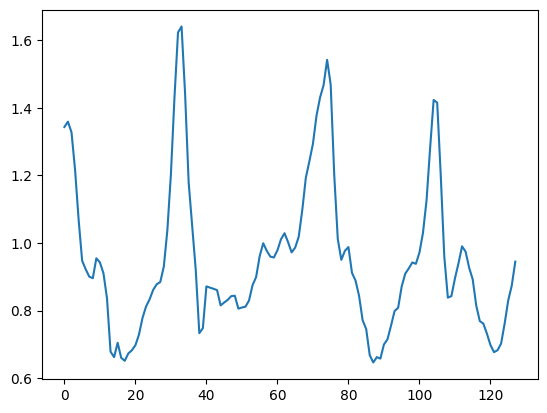

In [6]:
from matplotlib import pyplot as plt

y, x = next(iter(train_loader))
print(y.shape, x.shape)

plt.plot(x[0, :, 0])
plt.show()